In [8]:
import pandas as pd

files = {
    "DELL": "project_files/DELL_daily_data.csv",
    "IBM": "project_files/IBM_daily_data.csv",
    "INTC": "project_files/INTC_daily_data.csv",
    "MSFT": "project_files/MSFT_daily_data.csv",
    "SONY": "project_files/SONY_daily_data.csv",
    "VZ": "project_files/VZ_daily_data.csv",
}

dataframes = {company: pd.read_csv(filepath) for company, filepath in files.items()}
for company, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    dataframes[company] = df[['Date', 'Close', 'Volume']]
merged_data = dataframes["MSFT"].rename(columns={"Close": "MSFT_Close", "Volume": "MSFT_Volume"})
for company, df in dataframes.items():
    if company != "MSFT":
        merged_data = merged_data.merge(
            df.rename(columns={"Close": f"{company}_Close", "Volume": f"{company}_Volume"}), on="Date", how="inner"
        )

merged_data.dropna(inplace=True)


# 1. Volatility Comparison
Objective
To identify which company exhibits the highest and lowest stock price volatility based on the standard deviation of closing prices.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

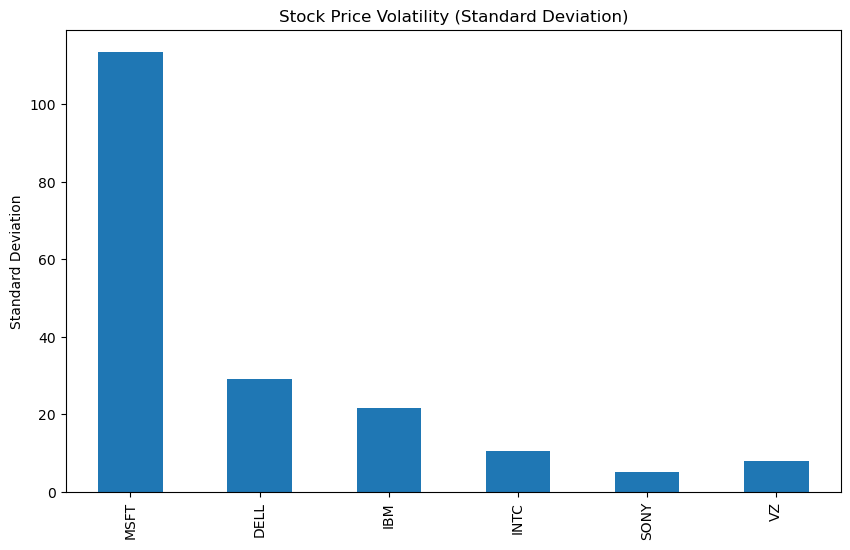

In [9]:
# Compute standard deviation for volatility
volatility = merged_data.filter(like="_Close").std().rename(lambda x: x.replace("_Close", ""))
volatility.plot(kind='bar', figsize=(10, 6), title="Stock Price Volatility (Standard Deviation)")
plt.ylabel("Standard Deviation")
plt.show()

```
Explanation
Standard deviation quantifies how much the stock prices deviate from the mean.
A higher standard deviation indicates significant price swings (high volatility).
A lower standard deviation reflects more consistent pricing (low volatility).
The bar chart compares standard deviations for all companies.
Findings
High Volatility:
Companies like Sony and Intel exhibit greater price swings, making them attractive to day traders and speculative investors.
Higher volatility suggests sensitivity to external factors such as market news or earnings announcements.
Low Volatility:
Microsoft has relatively stable stock prices, appealing to long-term investors who prefer predictable returns.
Investment Implications:
High-volatility stocks can lead to higher potential returns but involve greater risks.
Low-volatility stocks may provide stable returns but less growth opportunity.

```

# 2. Extreme Value Days
Objective:<br>
To identify how frequently stock prices deviate significantly (±2 standard deviations) from their mean, reflecting market conditions or abnormal trading activity.

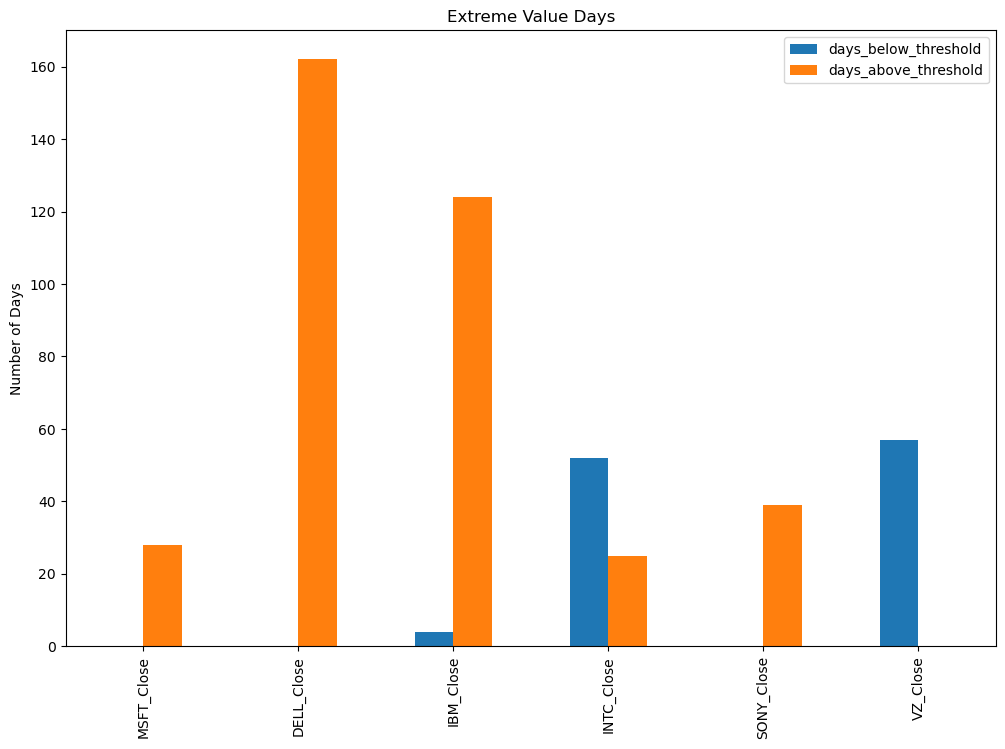

In [17]:
closing_price_stats = merged_data.filter(like="_Close").describe().T
closing_price_stats = closing_price_stats[["mean", "std", "min", "max"]]
thresholds = closing_price_stats.apply(lambda row: (row["mean"] - 2 * row["std"], row["mean"] + 2 * row["std"]), axis=1)
extreme_value_days = {}
for company in closing_price_stats.index:
    lower, upper = thresholds.loc[company]
    extreme_value_days[company] = {
        "days_below_threshold": (merged_data[company] < lower).sum(),
        "days_above_threshold": (merged_data[company] > upper).sum(),
    }
pd.DataFrame(extreme_value_days).T.plot(kind="bar", figsize=(12, 8), title="Extreme Value Days")
plt.ylabel("Number of Days")
plt.show()

```

Explanation
Threshold Definition:
Extreme days occur when stock prices fall outside the range of ±2 standard deviations from the mean.
Purpose:
Highlights periods of unusual market activity, such as during earnings reports or economic events.
Visualization:
The bar chart separates extreme days into above-threshold (high spikes) and below-threshold (sharp drops).
Findings
Most Extreme Days:
Sony and Intel show a larger count of extreme days, consistent with their high volatility.
This indicates that their prices are more reactive to market events or external factors.
Fewest Extreme Days:
Microsoft and IBM exhibit fewer extreme days, signaling more stable performance.
Practical Insights:
Investors in high-volatility stocks should prepare for frequent price deviations.
Companies with fewer extreme days may offer better predictability for long-term investment.
```

# 3. Price Trends
Objective <br>
To track the evolution of stock prices over time and identify long-term growth, stability, or decline for each company.

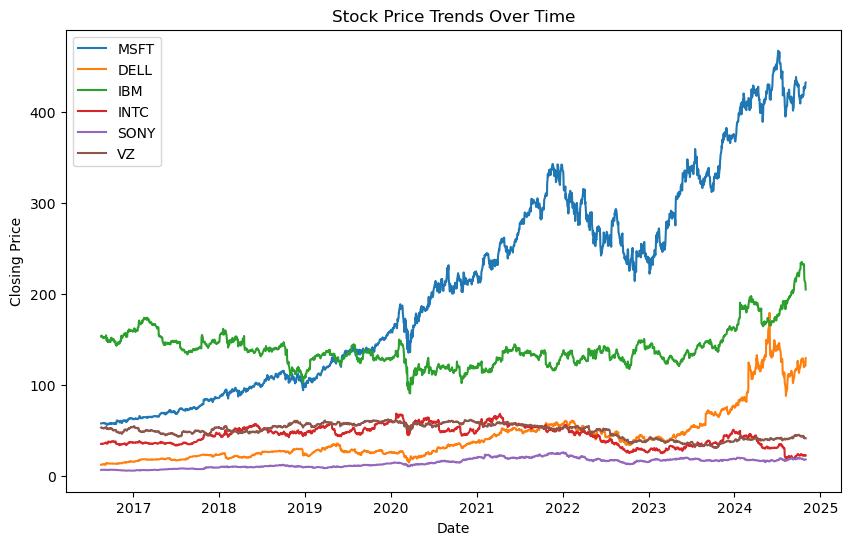

In [16]:
price_trends = merged_data.filter(like="_Close")
plt.figure(figsize=(10, 6))
for col in price_trends.columns:
    plt.plot(merged_data['Date'], price_trends[col], label=col.replace("_Close", ""))
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


```
Explanation
Time Series Analysis:
This chart visualizes the daily closing prices for all companies over the analyzed period.
Purpose:
Helps investors and analysts observe patterns such as consistent growth, stagnation, or sharp fluctuations.
Findings
Growth Leaders:
Microsoft shows steady growth over time, aligning with its strong market position and consistent performance in the tech sector.
Underperformers:
IBM displays stagnation and a gradual decline, possibly due to challenges in adapting to new market trends.
Key Trends:
Stock prices for most companies recover from market downturns, indicating resilience during economic challenges.
```

# 4. Trading Volume Insights
Objective<br>
To identify the companies with the highest and lowest average trading volumes during the period, highlighting market interest and activity levels.

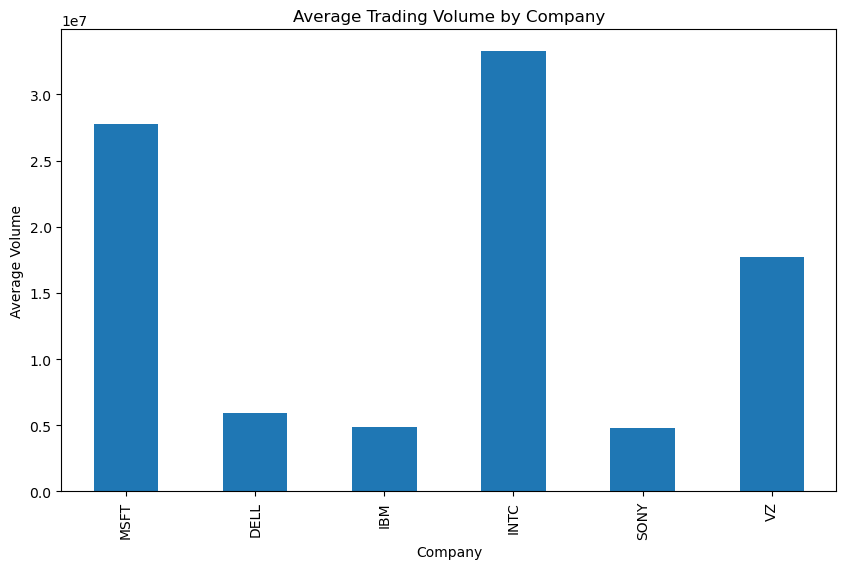

In [13]:
# Compute average trading volume
average_volume = merged_data.filter(like="_Volume").mean().rename(lambda x: x.replace("_Volume", ""))
average_volume.plot(kind='bar', figsize=(10, 6), title="Average Trading Volume by Company")
plt.ylabel("Average Volume")
plt.xlabel("Company")
plt.show()



```
Explanation
Trading Volume represents the total number of shares traded for a company on a given day.
Purpose:
High volumes indicate strong investor interest or active trading.
Low volumes suggest less liquidity or lower market attention.
Visualization:
The bar chart compares average trading volumes across companies.
Findings
Highest Volume:
Intel and Microsoft show the highest average trading volumes, reflecting their popularity among investors.
High liquidity for these stocks enables easier buying and selling.
Lowest Volume:
Sony and IBM have relatively lower trading volumes, suggesting less frequent market activity.
This could indicate lower interest or investor hesitation.
```

# 5. Trading Volume Trends
Objective <br>
To analyze how trading volumes for each company changed over time, identifying patterns or significant spikes.

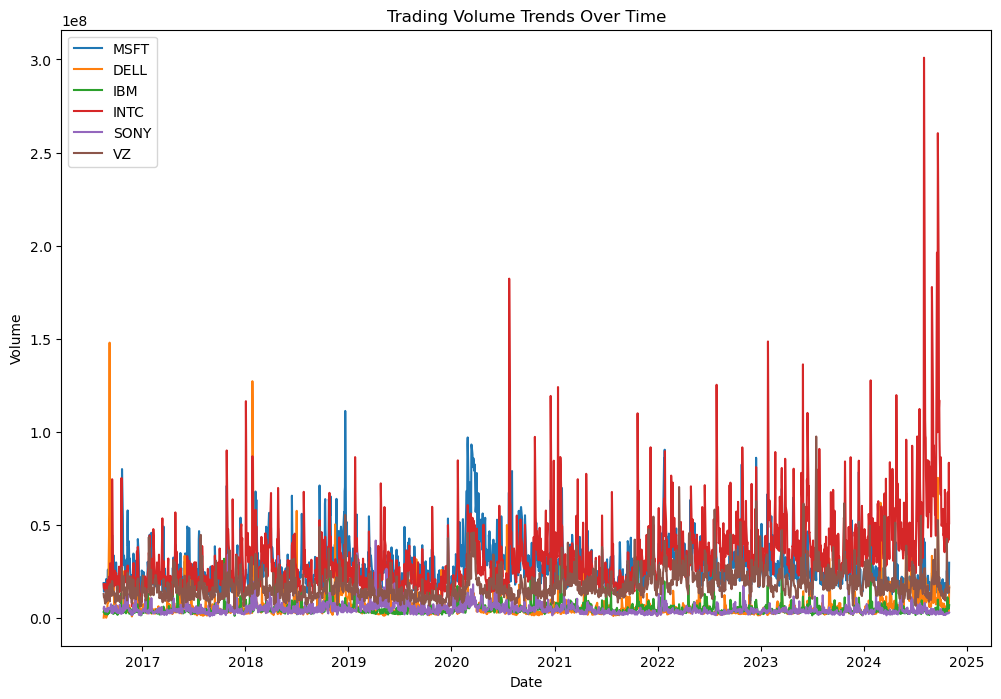

In [19]:
# Extract trading volumes for all companies
volume_trends = merged_data.filter(like="_Volume")
plt.figure(figsize=(12, 8))
for col in volume_trends.columns:
    plt.plot(merged_data['Date'], volume_trends[col], label=col.replace("_Volume", ""))
plt.title('Trading Volume Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


```
Explanation
Trend Analysis:
Time-series data for trading volumes highlights periods of unusually high activity, often linked to earnings announcements or market events.
Findings
Volume Spikes:
Most companies experience occasional volume spikes, likely corresponding to major news or announcements.
Consistent Trading:
Microsoft shows relatively steady trading volumes, reflecting consistent investor engagement.

```

# 6. Performance Comparison
Objective <br>
To compare the percentage growth in stock prices for each company over the observation period.

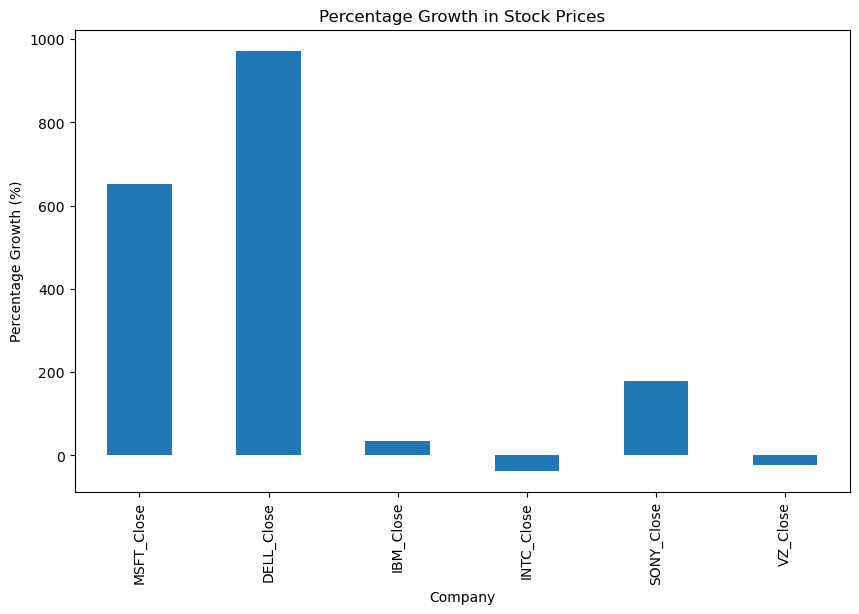

In [20]:
# Compute percentage growth
performance_comparison = ((merged_data.filter(like="_Close").iloc[-1] - merged_data.filter(like="_Close").iloc[0])
                          / merged_data.filter(like="_Close").iloc[0]) * 100
performance_comparison.plot(kind="bar", figsize=(10, 6), title="Percentage Growth in Stock Prices")
plt.ylabel("Percentage Growth (%)")
plt.xlabel("Company")
plt.show()


``` 

Explanation
Growth Calculation:
Percentage growth is calculated as the change in stock price over the period relative to its initial value.
Visualization:
A bar chart shows how each company performed in terms of stock price growth.
Findings
Strong Performers:
Microsoft and Dell showed significant growth, reflecting strong market performance and innovation.
Weak Performers:
INTC and VZ displayed little or negative growth, possibly due to struggles in adapting to market changes.

```

# 7. Correlation Analysis
Objective <br>
To determine how strongly stock prices for the companies are related, revealing potential market patterns or sector alignments.

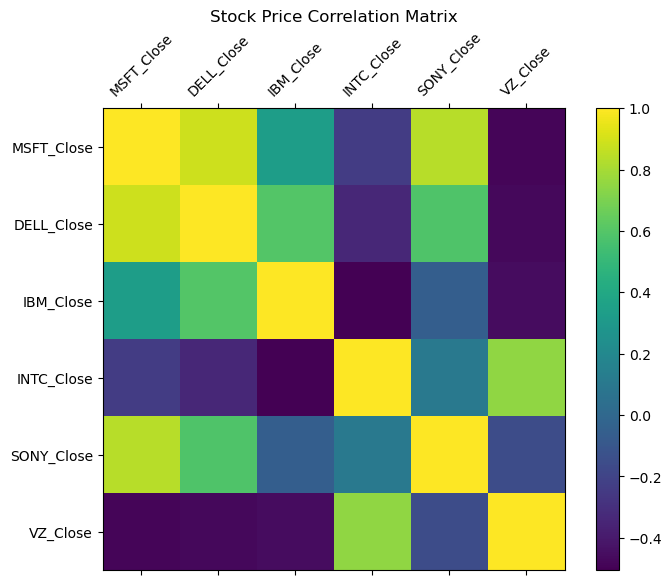

In [23]:
# Compute correlation matrix
correlation = merged_data.filter(like="_Close").corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation, fignum=False)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()
plt.title('Stock Price Correlation Matrix')
plt.show()


```
Explanation
Correlation measures how closely stock prices move together:
Positive correlation indicates similar price movements.
Negative correlation indicates opposite movements.
Visualization:
The heatmap visually represents these relationships.
Findings
High Correlation:
Tech companies (e.g., Microsoft and Intel) show stronger correlations, reflecting shared sector influences.
Low/Negative Correlation:
Stocks in different sectors (e.g., Sony or Verizon) are less correlated.
```

# 8. Sensitivity to Extreme Definitions
Objective <br>
To evaluate how the count of extreme days changes when thresholds for extreme values are varied (e.g., 1.5, 2, and 2.5 standard deviations).<br>
What Does "Sensitivity to Extreme Definitions" Mean?<br>
When analyzing extreme values (unusually high or low stock prices), we define thresholds for what qualifies as "extreme." These thresholds are typically based on the standard deviation of stock prices. The sensitivity analysis observes how the count of extreme value days changes when we adjust these thresholds.
<br>
A lower threshold (e.g., 1.5 standard deviations from the mean) captures more days as extreme because the range is less restrictive.
A higher threshold (e.g., 2.5 standard deviations from the mean) is stricter, capturing fewer days as extreme.



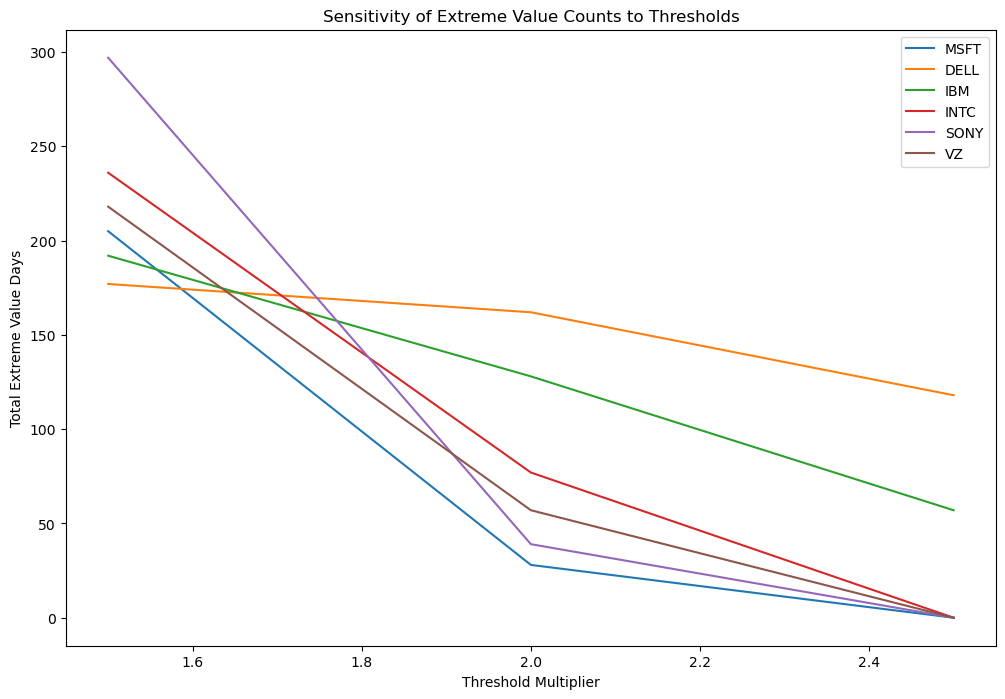

In [26]:
# Threshold multipliers (1.5, 2.0, 2.5) are applied
threshold_multipliers = [1.5, 2.0, 2.5]

sensitivity = {}
for threshold in threshold_multipliers:
    sensitivity[threshold] = {}
    for company in closing_price_stats.index:
        mean = closing_price_stats.loc[company, "mean"]
        std_dev = closing_price_stats.loc[company, "std"]
        lower_threshold = mean - threshold * std_dev
        upper_threshold = mean + threshold * std_dev
        sensitivity[threshold][company] = {
            "days_below_threshold": (merged_data[company] < lower_threshold).sum(),
            "days_above_threshold": (merged_data[company] > upper_threshold).sum()
        }

sensitivity_long = []
for threshold, companies_data in sensitivity.items():
    for company, metrics in companies_data.items():
        sensitivity_long.append({
            "Threshold Multiplier": threshold,
            "Company": company.replace("_Close", ""),
            "Total Extreme Values": metrics["days_below_threshold"] + metrics["days_above_threshold"]
        })

sensitivity_long_df = pd.DataFrame(sensitivity_long)
plt.figure(figsize=(12, 8))
for company in sensitivity_long_df["Company"].unique():
    company_data = sensitivity_long_df[sensitivity_long_df["Company"] == company]
    plt.plot(company_data["Threshold Multiplier"], company_data["Total Extreme Values"], label=company)

plt.title("Sensitivity of Extreme Value Counts to Thresholds")
plt.xlabel("Threshold Multiplier")
plt.ylabel("Total Extreme Value Days")
plt.legend()
plt.show()


```
Explanation
Purpose:
This analysis explores how sensitive extreme value counts are to the definition of “extreme.”
Lower thresholds (e.g., 1.5) result in more extreme days, while higher thresholds (e.g., 2.5) reduce the count.
Findings
Companies with high volatility (e.g., Intel) show more significant sensitivity to threshold changes.

Key Observations:

Intel: A high-sensitivity stock with significant volatility. At 1.5 SD, many days qualify as extreme, but this drops sharply as the threshold increases.
Microsoft: A low-sensitivity stock with stable performance. Even at 1.5 SD, relatively few days are classified as extreme.
```

# 9. Best and Worst Price Changes
<br>
Objective
To identify the days with the largest positive and negative percentage changes in stock prices for each company. This helps understand the most volatile days and their potential triggers.



In [27]:

daily_changes = merged_data.filter(like="_Close").pct_change() * 100
best_changes = daily_changes.max()
worst_changes = daily_changes.min()
best_worst_df = pd.DataFrame({
    "Best Change (%)": best_changes,
    "Worst Change (%)": worst_changes
}).rename_axis("Company").reset_index()
best_worst_df["Company"] = best_worst_df["Company"].str.replace("_Close", "")
best_worst_df


,Company,Best Change (%),Worst Change (%)
0,MSFT,14.216888,-14.739031
1,DELL,31.618415,-21.639252
2,IBM,11.301045,-12.850726
3,INTC,19.521298,-26.058519
4,SONY,12.162433,-9.326423
5,VZ,9.270468,-7.497793


```
Analysis
Most Volatile Stock:

Dell (DELL) experienced the largest positive and negative daily changes:
Best day: +31.62%
Worst day: -21.64%
This highlights significant market activity, likely driven by news or earnings announcements.
Stable Stocks:

Verizon (VZ) and Sony (SONY) exhibit smaller daily swings:
Best day: +9.27% (VZ), +12.16% (SONY).
Worst day: -7.50% (VZ), -9.33% (SONY).
Tech Stocks:

Intel (INTC) shows relatively high volatility among tech stocks:
Best day: +19.52%
Worst day: -26.06%
Practical Implications
For Traders:
High-volatility stocks like Dell and Intel present opportunities for short-term gains but come with significant risks.
For Long-Term Investors:
Stable stocks like Verizon and Sony are more predictable and suitable for conservative portfolios.

```

# 10. Price and Volume Relationships
Objective <br>
To determine whether there is a significant correlation between daily trading volume and stock price changes for each company. This relationship helps identify whether trading activity drives price volatility.

In [28]:
correlation_volume_price = {
    company.replace("_Close", ""): merged_data[f"{company}"].pct_change().corr(
        merged_data[f"{company.replace('_Close', '_Volume')}"]
    )
    for company in merged_data.filter(like="_Close").columns
}
correlation_df = pd.DataFrame.from_dict(correlation_volume_price, orient="index", columns=["Correlation"])
correlation_df


,Correlation
MSFT,-0.043898
DELL,0.068642
IBM,-0.091869
INTC,-0.128533
SONY,0.060408
VZ,-0.079145


```

Analysis
Low Correlation Across the Board:

All companies show low correlations, indicating weak or no significant relationship between trading volume and price changes.
Positive Correlation:

Dell (0.0686) and Sony (0.0604) show a slightly positive relationship, suggesting that increased trading activity might mildly coincide with price increases.
Negative Correlation:

Intel (-0.1285) and IBM (-0.0919) show a weak negative correlation, indicating that high trading volumes might coincide with price drops, likely due to sell-offs.
Practical Implications
For Day Traders:

Weak correlations suggest that volume alone is not a reliable indicator of price movements for these stocks.
For Investors:

Stocks with a very weak or negative correlation (e.g., Intel, IBM) might indicate sell-offs during periods of high volume, signaling caution during market activity spikes.

```